In [1]:
import spotipy

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpld3
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d.art3d import PolyCollection

plt.rcParams["figure.dpi"] = 140
plt.rcParams["font.size"] = 14

import DataProcessing as da

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from scipy.fft import fft, fftfreq
from scipy.signal import savgol_filter

import pandas as pd
import alphashape as ap
from descartes import PolygonPatch
import tqdm

import colour

import time

In [2]:
spotify = da.authenticate()

playlistArr = da.fetchPublicPlaylists('Jack5225x', spotify)
playlistArr

,name,uri,tracks:total,owner:display_name
0,Indie Chillout,spotify:playlist:37i9dQZF1DX9B1hu73DioC,100,Spotify
1,Heavy Metal,spotify:playlist:37i9dQZF1DX9qNs32fujYe,150,Spotify
2,biggest playlist ever,spotify:playlist:4rnleEAOdmFAbRcNCgZMpY,5295,Susanna Ketola
3,Summer 2022,spotify:playlist:2kOkouhQxj8iAkerFQRuYb,73,Jack
4,Goes pretty hard,spotify:playlist:6wCi2uxANYtxt1yLcfTXi8,12,Jack
5,Coffee Shop,spotify:playlist:0ABpbu3ojRHU6ExsgUh53g,19,Jack
6,Bigums,spotify:playlist:1yLFxTQg7cN9MKmWqtxoI3,150,Jack
7,New Running,spotify:playlist:4uTbZI7nI2DBBG1rSeXMDk,61,Jack
8,Spring 2021,spotify:playlist:6g3mROHWIjjurXVMYYOE7h,55,Jack
9,Winter 2021,spotify:playlist:4NIN7lOL7bpxsrlNsQFwgm,68,Jack


In [9]:
[t["track"]["uri"] for t in spotify.playlist(playlistArr["uri"][0])["tracks"]["items"]]

['spotify:track:7zgqtptZvhf8GEmdsM2vp2',
 'spotify:track:4Vxu50qVrQcycjRyJQaZLC',
 'spotify:track:6b8Be6ljOzmkOmFslEb23P',
 'spotify:track:0afhq8XCExXpqazXczTSve',
 'spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL',
 'spotify:track:0ofbQMrRDsUaVKq2mGLEAb',
 'spotify:track:0nJW01T7XtvILxQgC5J7Wh',
 'spotify:track:6C2PfemHQul77DVpnvuAIs',
 'spotify:track:3PGdPUMdUg7a3Tgr5gkfKK',
 'spotify:track:34gCuhDGsG4bRPIf9bb02f',
 'spotify:track:3528IXKpbb7OMjdjWYlbfD',
 'spotify:track:7AEAGTc8cReDqcbPoY9gwo',
 'spotify:track:273dCMFseLcVsoSWx59IoE',
 'spotify:track:1X1DWw2pcNZ8zSub3uhlNz',
 'spotify:track:1LmN9SSHISbtp9LoaR5ZVJ',
 'spotify:track:2iuZJX9X9P0GKaE93xcPjk',
 'spotify:track:0JcKdUGNR7zI4jJDLyYXbi',
 'spotify:track:0KKkJNfGyhkQ5aFogxQAPU',
 'spotify:track:2Bs4jQEGMycglOfWPBqrVG',
 'spotify:track:72Q0FQQo32KJloivv5xge2',
 'spotify:track:59HjlYCeBsxdI0fcm3zglw',
 'spotify:track:5Z3GHaZ6ec9bsiI5BenrbY',
 'spotify:track:1D1nixOVWOxvNfWi0UD7VX',
 'spotify:track:3zSCNTXI7Ed0PiidZVmzIe',
 'spotify:track:

In [3]:
index = 2

tracks = da.fetchPlaylistTracks(playlistArr["uri"][index], spotify)
print(playlistArr["name"][index])
phaseSpace, identities, featureNames = da.mergePlaylistTracks(playlistArr["uri"][index:index+1], spotify)

biggest playlist ever


KeyError: 'id'

In [3]:
tracks = da.fetchAllSavedSongs(spotify)
tracks = tracks.iloc[::6]

In [10]:
playlistArr["uri"][0]

'spotify:playlist:5S8SJdl1BDc0ugpkEvFsIL'

In [3]:
index = 2
numTracks = 250

shuffleOrderArr = []
randomOrderArr = []

tracks = da.fetchPlaylistTracks(playlistArr["uri"][index], spotify)
playlistTrackURIs = tracks["uri"]
uriToIndex = dict(zip(playlistTrackURIs, np.arange(len(playlistTrackURIs))))
phaseSpace, identities, featureNames = da.mergePlaylistTracks(playlistArr["uri"][index:index+1], spotify, normalize=True)

In [ ]:
while True:
    #shuffleOrder = da.fetchShuffleOrder(spotify, tracks=tracks, numTracks=200, debug=True)
    # Fetch order of songs in the shuffle (in URI format)
    shuffleOrder = da.fetchShuffleOrder(spotify, contextURI=playlistArr["uri"][index], numTracks=numTracks, debug=True)
    # Convert URI to index in the playlist
    shuffleOrderIndices = [uriToIndex.get(uri) for uri in shuffleOrder]
    # Remove None
    shuffleOrderIndices = [i for i in shuffleOrderIndices if i]
    
    randomOrder = np.arange(len(uriToIndex))
    np.random.shuffle(randomOrder)
    randomOrder = randomOrder[:numTracks]

    shuffleOrderArr.append(shuffleOrderIndices)
    randomOrderArr.append(randomOrder)
    
    print([len(o) for o in shuffleOrderArr])
    #break
    time.sleep(15)
    # Renew the spotify credentials
    spotify = da.authenticate()

Finished shuffling, starting playback...
Skipped through 21/250 tracks.
Skipped through 41/250 tracks.
Skipped through 61/250 tracks.
Skipped through 81/250 tracks.
Skipped through 101/250 tracks.
Skipped through 121/250 tracks.
Skipped through 141/250 tracks.
Skipped through 161/250 tracks.
Skipped through 181/250 tracks.
Skipped through 201/250 tracks.
Skipped through 221/250 tracks.
Skipped through 241/250 tracks.
Skipped through 261/250 tracks.
[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]
Finished shuffling, starting playback...
Skipped through 21/250 tracks.
Skipped through 41/250 tracks.
Skipped through 61/250 tracks.
Skipped through 81/250 tracks.
Skipped through 101/250 tracks.
Skipped through 121/250 tracks.
Skipped through 141/250 tracks.
Skipped through 161/250 tracks.
Skipped through 181/250 tracks.
Skipped through 201/250 tracks.
Skipped through 221/250 tracks.
Skipped through 241/250 tracks.
Skipped through 261/250 tracks.
[250, 250, 25

In [ ]:
len(np.unique(shuffleOrderArr[0]))
len([uriToIndex.get(uri) for uri in shuffleOrder if uriToIndex.get(uri) is not None])
#len(playlistTrackURIs)
#playlistTrackURIs[np.where(np.unique(playlistTrackURIs, return_counts=True)[1] == 2)[0][1]]

In [12]:
phaseSpace = tracks.copy()
# Now we remove data that shouldn't affect the dimensionality
# reduction, like the name, id, etc. These are nice to have for
# user readability, but for the calculation we do not want them.
# It is easier to specify which columns will be removed as opposed
# to which will be kept
removeColumns = ['name', 'id', 'artists:name', 'duration_ms']

for k in removeColumns:
    del phaseSpace[k]

# Now we have a full list of every song, including corresponding
# membership to certain playlists.

# The last thing we want to do is to scale the data in a uniform way
# This is a common preprocessing technique when doing LDA or PCA
scaler = StandardScaler(copy=False)
phaseSpace = scaler.fit(phaseSpace).transform(phaseSpace)

In [5]:
[len(np.unique(o, return_counts=True)[0]) for o in shuffleOrderArr]

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [14]:
[-1 in o for o in shuffleOrderArr]

[False, False, False, False, False, False]

In [8]:
shuffleOrderArr[0]

array([ -1,  17, 404, 416, 440, 169, 149,  96, 182, 432, 366, 394, 353,
        84, 350, 137,  85, 269, 123, 185, 255, 388, 342, 217,  32,  94,
       208, 358,  67, 110,  18, 375, 267,  80,  89, 444, 360,  56,  58,
       418, 118,  72, 207, 239, 272, 214, 398, 289, 438, 354,  86, 204,
       308, 372, 313, 115, 415, 162, 259,  60, 151, 306, 327, 172, 290,
       163, 160, 437, 441, 420, 310, 121, 406,  24, 389, 330, 429,  20,
       191, 201, 447, 435,  52,   8,  75, 132, 428, 318, 268, 122,  98,
       258, 100,  95, 184, 301, 229, 396, 232, 434, 107, 141, 325, 199,
       293, 431,   1, 245, 166, 131, 145, 349, 220, 346, 446,  26, 165,
       198,  74, 359, 329, 378, 246,  29, 102, 347, 411, 284, 275, 235,
       285, 254, 386, 417, 356, 105,  79,   6, 168, 448,  93,  82,  68,
        66, 271, 171, 339, 231,  34, 138, 315, 143,   3, 345, 391, 136,
       193, 179, 412, 276, 287,  91, 226,  77, 332, 192, 407, 264,  22,
       215, 196,  90, 381,  12, 334, 341, 164, 371, 260, 328, 26

In [50]:
randomOrderArr = []
for i in range(len(shuffleOrderArr)):
    randomOrder = np.arange(len(shuffleOrder))
    np.random.shuffle(randomOrder)
    randomOrderArr.append(randomOrder)

In [38]:
#oldPhaseSpace = phaseSpace.copy()
print(featureNames)
phaseSpace = oldPhaseSpace.copy()
phaseSpace = phaseSpace[:,[1,3,5,6,7,9]]

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')


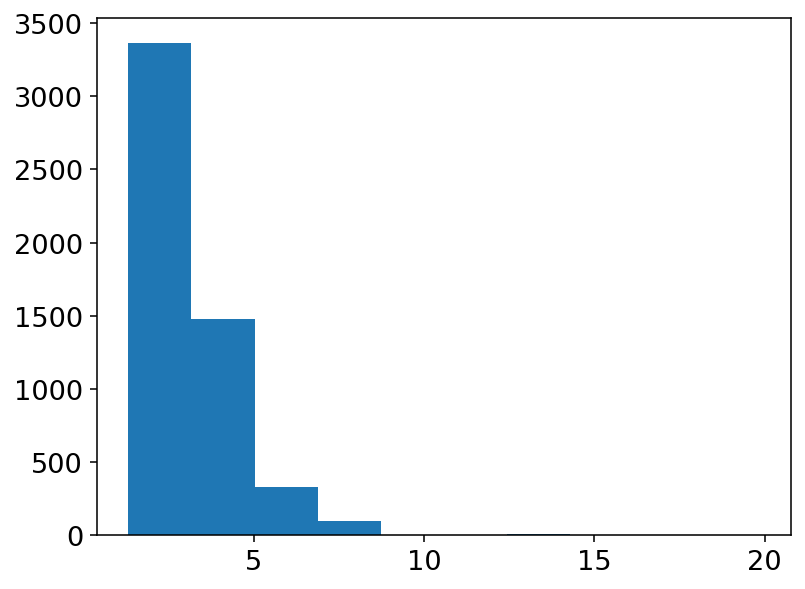

Average deviation from circumcenter: 3.210260909884487
Circumdiameter: 39.69468028558342


In [5]:
# Compute circumradius of the phase space volume
# to normalize the distance
#circumradius = ap.circumradius(phaseSpace)

# Compute the average distance from the center of the point cloud
pointCloudCenter = np.mean(phaseSpace, axis=0)
deviation = np.sqrt(np.sum((phaseSpace - pointCloudCenter)**2, axis=-1))

plt.hist(deviation)
plt.show()

circumdiameter = 2 * np.max(deviation)

print(f'Average deviation from circumcenter: {np.mean(deviation)}')
print(f'Circumdiameter: {circumdiameter}')

In [6]:
numBins = 40

bins = None
shuffleHistArr = []
randomHistArr = []

shuffleDistanceArr = []
randomDistanceArr = []

for i in range(len(shuffleOrderArr)):
    # Compute distance between each step for both orders
    shuffleDistance = np.sqrt(np.sum((phaseSpace[shuffleOrderArr[i][1:]] - phaseSpace[shuffleOrderArr[i][:-1]])**2, axis=-1))
    randomDistance = np.sqrt(np.sum((phaseSpace[randomOrderArr[i][1:]] - phaseSpace[randomOrderArr[i][:-1]])**2, axis=-1))

    shuffleDistanceArr.append(shuffleDistance)
    randomDistanceArr.append(randomDistance)
    
    # Compute histograms
    shuffleHist, shuffleBins = np.histogram(shuffleDistance, bins=numBins, density=True)
    randomHist, randomBins = np.histogram(randomDistance, bins=numBins, density=True)

    bins = randomBins
    shuffleHistArr.append(shuffleHist)
    randomHistArr.append(randomHist)

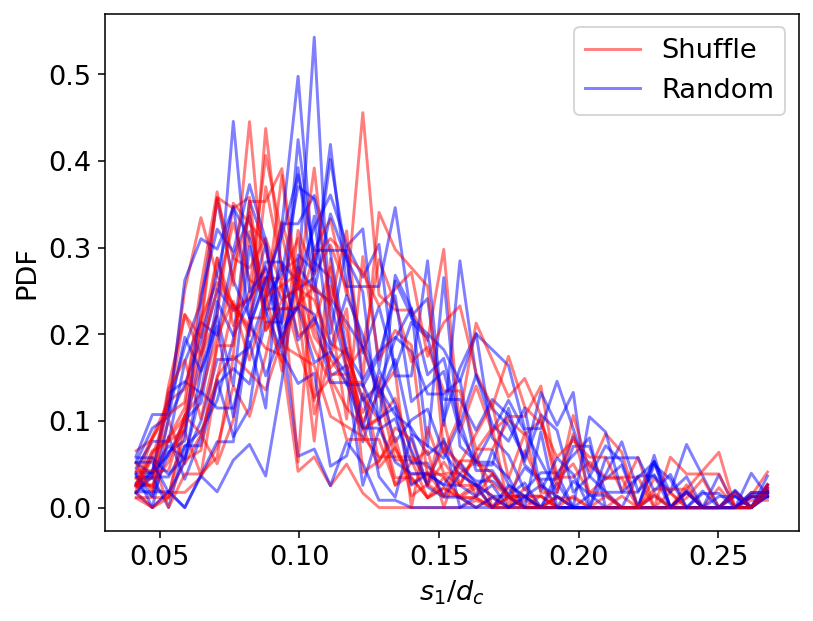

In [7]:
shuffleColors = [str(c) for c in colour.Color('Red').range_to(colour.Color('orange'), len(shuffleHistArr))]
randomColors = [str(c) for c in colour.Color('Blue').range_to(colour.Color('cyan'), len(randomHistArr))]

centeredBins = (bins[1:] + bins[:-1])/2

for i in range(len(randomHistArr)):
    plt.plot(centeredBins/circumdiameter, shuffleHistArr[i], c=shuffleColors[0], label='Shuffle' if i == 0 else None, alpha=.5)
    plt.plot(centeredBins/circumdiameter, randomHistArr[i], c=randomColors[0], label='Random' if i == 0 else None, alpha=.5)

plt.xlabel(r'$s_1 / d_c$')
plt.ylabel('PDF')

plt.legend()
#plt.savefig('bigums_s1_pdf_all.png')
plt.show()

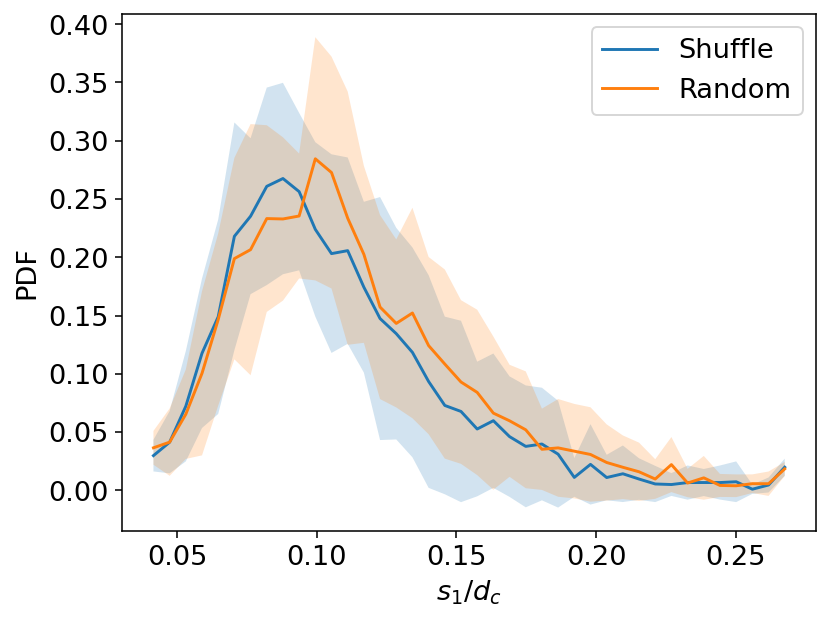

In [8]:
shuffleErrorBars = np.std(np.array(shuffleHistArr) - np.mean(shuffleHistArr, axis=0), axis=0)
randomErrorBars = np.std(np.array(randomHistArr) - np.mean(randomHistArr, axis=0), axis=0)

plt.plot(centeredBins/circumdiameter, np.mean(shuffleHistArr, axis=0), label='Shuffle')
plt.fill_between(centeredBins/circumdiameter, np.mean(shuffleHistArr, axis=0) + shuffleErrorBars, np.mean(shuffleHistArr, axis=0) - shuffleErrorBars, alpha=.2)
plt.plot(centeredBins/circumdiameter, np.mean(randomHistArr, axis=0), label='Random')
plt.fill_between(centeredBins/circumdiameter, np.mean(randomHistArr, axis=0) + randomErrorBars, np.mean(randomHistArr, axis=0) - randomErrorBars, alpha=.2)

plt.xlabel(r'$s_1 / d_c$')
plt.ylabel('PDF')

plt.legend()
#plt.savefig('bigums_s1_pdf.png')
plt.show()

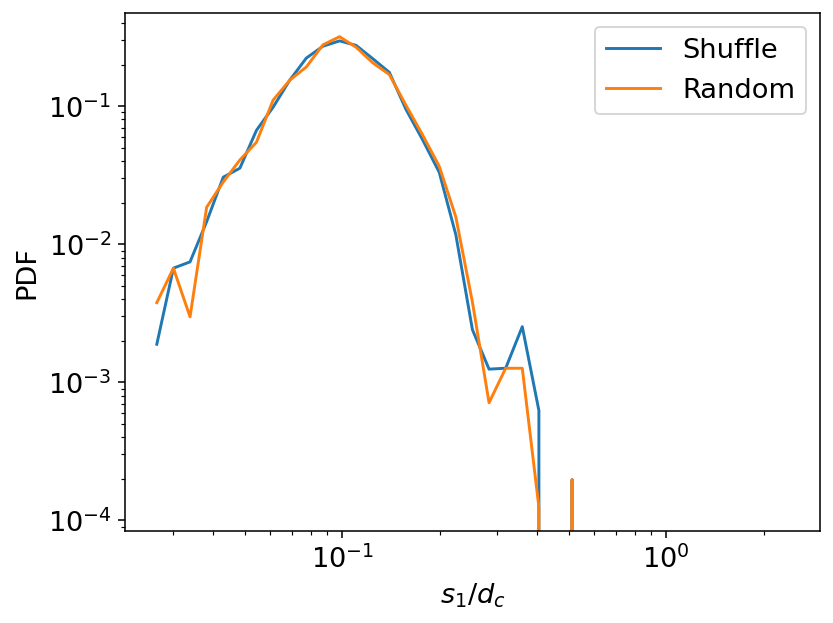

In [9]:
shuffleHist, shuffleBins = np.histogram(np.array(shuffleDistanceArr).flatten(), bins=np.logspace(0, 2, numBins), density=True)
randomHist, randomBins = np.histogram(np.array(randomDistanceArr).flatten(), bins=np.logspace(0, 2, numBins), density=True)

plt.plot((shuffleBins[1:] + shuffleBins[:-1])/2 / circumdiameter, shuffleHist, label='Shuffle')
plt.plot((randomBins[1:] + randomBins[:-1])/2 / circumdiameter, randomHist, label='Random')

plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.xlabel(r'$s_1 / d_c$')
plt.ylabel('PDF')

#plt.savefig('bigums_s1_pdf_log.png')
plt.show()

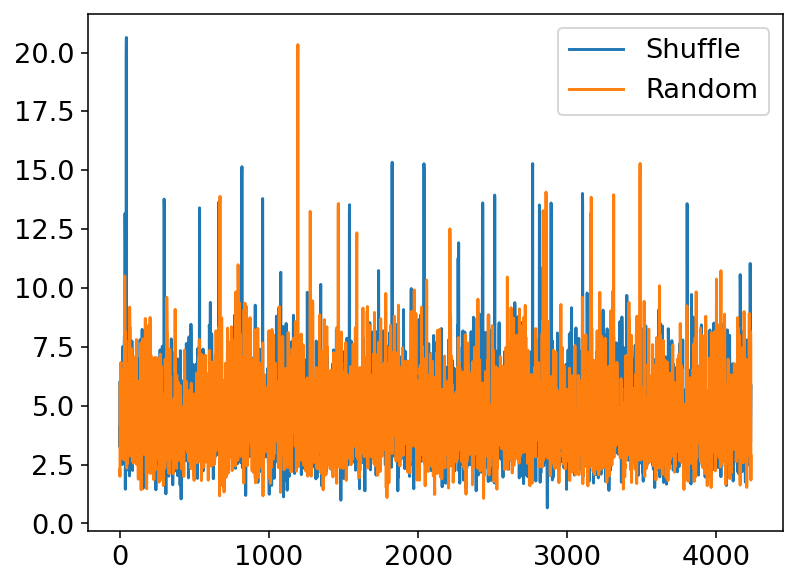

In [10]:
plt.plot(np.array(shuffleDistanceArr).flatten(), label="Shuffle")
plt.plot(np.array(randomDistanceArr).flatten(), label="Random")
plt.legend()
plt.show()

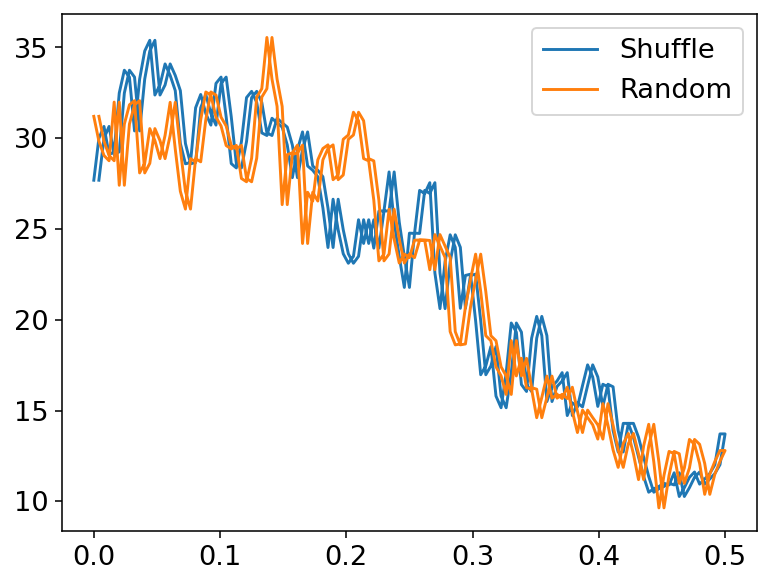

In [11]:
shuffleFFTArr = [np.abs(fft(s)[1:]) for s in shuffleDistanceArr]
randomFFTArr = [np.abs(fft(r)[1:]) for r in randomDistanceArr]
freqArr = np.abs(fftfreq(len(shuffleDistanceArr[0])-1, d=1))

plt.plot(freqArr, savgol_filter(np.mean(shuffleFFTArr, axis=0), 5, 2), label="Shuffle")
plt.plot(freqArr, savgol_filter(np.mean(randomFFTArr, axis=0), 5, 2), label="Random")
plt.legend()
plt.show()

In [39]:
np.mean(shuffleFFTArr, axis=0)

array([380.63312014, 293.92683268, 336.06097228, 288.31647571,
       358.94369155, 367.41937413, 356.46140441, 322.63595373,
       421.07770344, 343.30266469, 368.89876427, 354.71402491,
       364.6527027 , 328.68853318, 327.27517907, 390.34183594,
       392.99602333, 394.53068237, 352.38838862, 344.25709336,
       435.89722909, 386.57092308, 350.13641901, 287.77312141,
       400.63992511, 329.75908035, 467.77448765, 427.20868699,
       395.08267047, 329.19811486, 284.3086731 , 317.30116027,
       420.43919574, 470.63760687, 422.10022947, 308.53097677,
       337.99361575, 265.58378426, 322.60723042, 327.38727107,
       372.33331006, 356.59896677, 333.25953416, 364.56130316,
       297.71652313, 288.84110863, 309.27997302, 319.08206405,
       360.79373196, 246.46051377, 313.06931173, 409.2271494 ,
       355.23725214, 314.7626701 , 376.45908435, 288.33294329,
       322.99561782, 305.98496183, 278.84029603, 363.82074823,
       357.53687025, 301.11691719, 291.30383488, 237.04

In [32]:
freqArr

array([ 0.        ,  0.00401606,  0.00803213,  0.01204819,  0.01606426,
        0.02008032,  0.02409639,  0.02811245,  0.03212851,  0.03614458,
        0.04016064,  0.04417671,  0.04819277,  0.05220884,  0.0562249 ,
        0.06024096,  0.06425703,  0.06827309,  0.07228916,  0.07630522,
        0.08032129,  0.08433735,  0.08835341,  0.09236948,  0.09638554,
        0.10040161,  0.10441767,  0.10843373,  0.1124498 ,  0.11646586,
        0.12048193,  0.12449799,  0.12851406,  0.13253012,  0.13654618,
        0.14056225,  0.14457831,  0.14859438,  0.15261044,  0.15662651,
        0.16064257,  0.16465863,  0.1686747 ,  0.17269076,  0.17670683,
        0.18072289,  0.18473896,  0.18875502,  0.19277108,  0.19678715,
        0.20080321,  0.20481928,  0.20883534,  0.21285141,  0.21686747,
        0.22088353,  0.2248996 ,  0.22891566,  0.23293173,  0.23694779,
        0.24096386,  0.24497992,  0.24899598,  0.25301205,  0.25702811,
        0.26104418,  0.26506024,  0.26907631,  0.27309237,  0.27

In [44]:
with open('data/2023-04-02/shuffle_order.npy', 'wb') as f:
    np.save(f, np.array(shuffleOrderArr, dtype=int))
    
with open('data/2023-04-02/random_order.npy', 'wb') as f:
    np.save(f, np.array(randomOrderArr, dtype=int))

with open('data/2023-04-02/phase_space.npy', 'wb') as f:
    np.save(f, phaseSpace)

tracks.to_csv('data/2023-04-02/tracks.csv')

In [4]:
with open('data/2023-04-02/shuffle_order.npy', 'rb') as f:
    shuffleOrderArr = list(np.load(f))
    
with open('data/2023-04-02/random_order.npy', 'rb') as f:
    randomOrderArr = list(np.load(f))

In [33]:
np.unique(shuffleOrderArr[1], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [34]:
shuffleOrderArr[1]

array([ 9, 98, 63,  4, 59, 25, 62, 38, 68, 56, 61, 92, 75,  6, 45,  3, 34,
       69, 15, 52, 47, 14, 74,  7, 37, 24, 31, 60, 90, 44, 89, 58, 57, 23,
       39, 76, 80,  1, 95, 36, 10,  2, 86, 46, 49, 73, 96, 20, 97, 67, 93,
       55, 77, 32, 35, 94, 72, 50, 64, 65, 29, 78, 82, 66, 70, 99, 81, 28,
       22,  8, 84, 19, 16, 21, 13,  0, 27, 26, 83, 18, 11, 11, 33, 71, 41,
       43, 54, 40, 17, 85, 91, 53, 42, 48, 87,  5, 30, 51, 88, 79, 12])

,name,artists:name,id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Bad Day,Charlotte Sands,5IzJBDURDhsfIWXE2kGvWb,153931,0.677,0.830,9,-5.217,1,0.0900,0.1430,0.000005,0.1950,0.934,145.071,4
1,Street Lightning,The Summer Set,3gJjKP92tOoLpvKa0BH6Ay,216497,0.566,0.739,1,-4.867,1,0.0443,0.0753,0.000000,0.1480,0.336,147.979,4
2,Honey Hold Me,Morningsiders,69XWcpV2x4YZWaCvstSRlK,181454,0.606,0.567,0,-6.841,1,0.0268,0.3670,0.003250,0.1900,0.521,82.012,4
3,Milhouse,Maisie Peters,7gXElAFWjRZQHcr3ZGkIgm,153533,0.514,0.471,2,-8.843,1,0.0768,0.7910,0.000000,0.1060,0.717,169.757,4
4,Sugar in a Bowl,Of Monsters and Men,5MKfqLrtXhoq4zZu86BPzA,168626,0.587,0.325,10,-13.432,1,0.0796,0.3820,0.000082,0.3620,0.429,75.899,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,Nothing Left (feat. Will Heard),"Kygo, Will Heard",0j0DNujXWeupLpZobbABoo,236682,0.679,0.576,4,-6.609,0,0.0402,0.2610,0.000113,0.3660,0.348,154.090,4
31,Firestone,"Kygo, Conrad Sewell",1I8tHoNBFTuoJAlh4hfVVE,271640,0.704,0.634,11,-7.374,0,0.0428,0.3930,0.000032,0.0952,0.411,113.927,4
32,Riptide,Vance Joy,3JvrhDOgAt6p7K8mDyZwRd,204280,0.484,0.731,1,-6.694,1,0.0379,0.4310,0.000000,0.1510,0.510,101.654,4
33,All Time Low,Jon Bellion,0SuLAslEMFZAXf0SwY7syi,217603,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.505,90.246,4


In [5]:
queue = spotify.queue()["currently_playing"]
queue["name"]

'Purple'